In [1]:
import matplotlib.pyplot as plt
from IPython.display import display

from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

In [2]:
images_dir = 'test\\img'
annotations_dir = 'test\\xml'
yolo_dir = 'test\\yolo'

### HELPER FUNCTION TO DRAW BOXES

In [3]:
def draw_boxes_xml(file):
    sample_image = Image.open(f'{images_dir}\\{file}.jpg')
    tree = ET.parse(f'{annotations_dir}\\{file}.xml')
    root = tree.getroot()

    sample_annotations = []

    for neighbor in root.iter('bndbox'):
        xmin = int(neighbor.find('xmin').text)
        ymin = int(neighbor.find('ymin').text)
        xmax = int(neighbor.find('xmax').text)
        ymax = int(neighbor.find('ymax').text)

    #     print(xmin, ymin, xmax, ymax)
        sample_annotations.append([xmin, ymin, xmax, ymax])


    sample_image_annotated = sample_image.copy()

    img_bbox = ImageDraw.Draw(sample_image_annotated)

    for bbox in sample_annotations:
        img_bbox.rectangle(bbox, outline="yellow") 

    display(sample_image_annotated)

#### Sample images

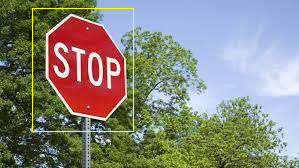

In [4]:
draw_boxes_xml(1)

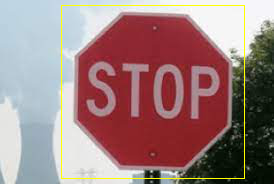

In [5]:
draw_boxes_xml(2)

### Using the function to convert into YOLO format.

In [6]:
from xmltoyolo import *
xml2yolo('test\\classes.txt', annotations_dir, yolo_dir)

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 128.79it/s]

Classes:  {'stop': 0}
